# Assignment 04 - Transfer Learning and Bounding Boxes and YOLOV8

# Part 2: Follow the steps in YOLOV8 and attach a screenshot of object detection

## Mac: https://pysource.com/2023/03/28/object-detection-with-yolo-v8-on-mac-m1/ buttery fly dataset: use ~10 images from https://universe.roboflow.com/yolo-a6y21/squid-bat-butterfly

## You can also try butterfly video and detect objects. (do not submit it)

In [ ]:
!pip install ultralytics


0: 384x640 2 dogs, 4649.6ms
Speed: 93.6ms preprocess, 4649.6ms inference, 977.1ms postprocess per image at shape (1, 3, 384, 640)


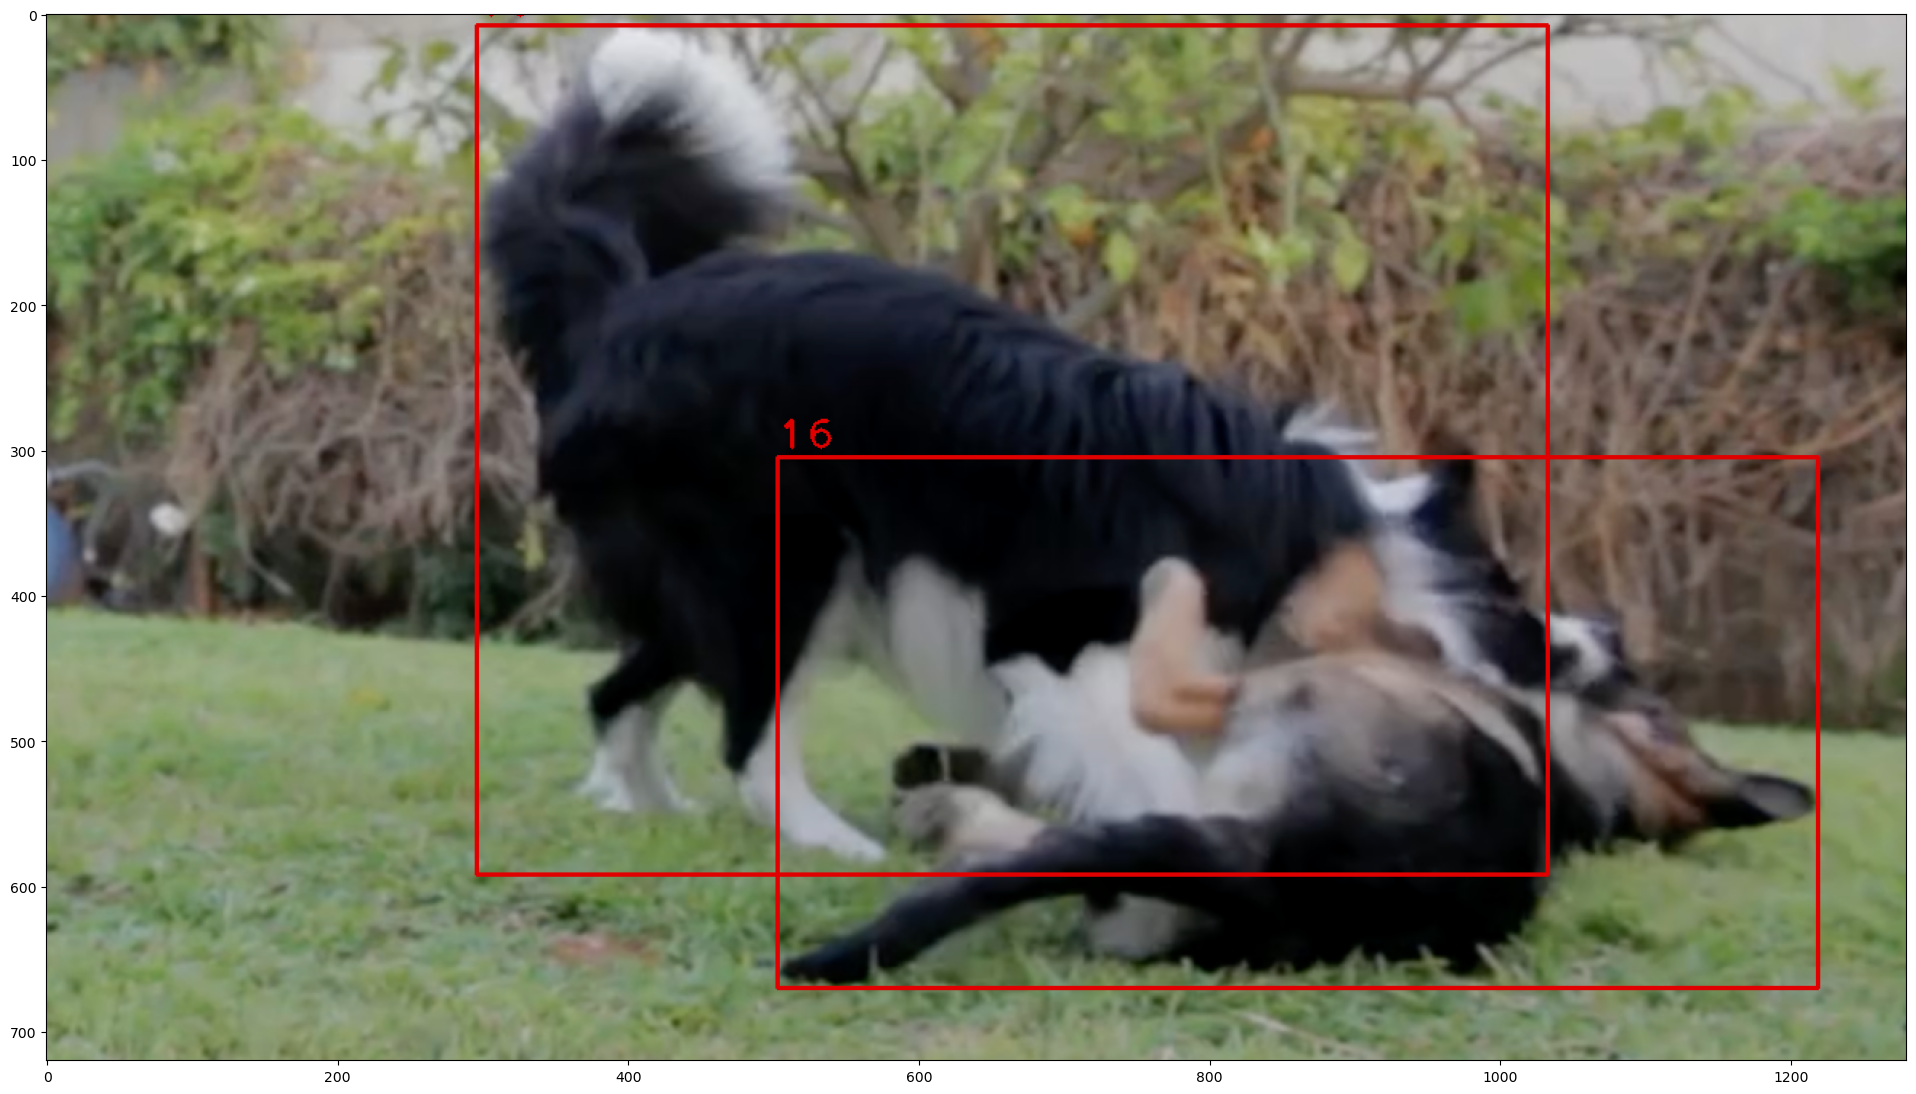

In [28]:
# Working dog
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np

import cv2

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

model = YOLO("yolov8m.pt")

# Define the function to perform detection on an image
def detect_objects(image_path):
    
    # Load the image
    image = Image.open(image_path)
    frame = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)
    
    results = model(frame, device="mps")
    result = results[0]
    bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
    classes = np.array(result.boxes.cls.cpu(), dtype="int")
    for cls, bbox in zip(classes, bboxes):
        (x, y, x2, y2) = bbox
        cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 225), 2)
        cv2.putText(frame, str(cls), (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 225), 2)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    image2 = Image.fromarray(frame_rgb)
    plt.figure(figsize=(24,32))
    plt.imshow(image2)
    plt.show()
    
# detect_objects('/Users/hims/Downloads/Squid Bat Butterfly.v2i.yolov8/train/images/01_jpg.rf.28abb439874a51775e1aa43db4868b56.jpg')
detect_objects('/Users/hims/Downloads/YOLO-v8-on-mac-m1/dog.png')

# cv2.destroyAllWindows()


In [1]:
%%bash
ls -lrt
yolo mode=train task=detect model=yolov8n.pt data=/Users/hims/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets/data.yaml epochs=3 imgsz=640 plots=True


total 132072
-rw-r--r--@  1 hims  staff    114944 Feb 24 16:18 Assignment-4.pdf
-rw-r--r--@  1 hims  staff      1759 Feb 25 23:27 Anjali_Ojha_HW_3_Part2.ipynb
-rw-r--r--   1 hims  staff      2189 Feb 25 23:28 Anjali_Ojha_HW_3_Part1.ipynb
drwxr-xr-x@  7 hims  staff       224 Feb 26 01:08 Demo 04 Obj Det
-rw-r--r--   1 hims  staff  52117635 Feb 26 14:28 yolov8m.pt
-rw-r--r--   1 hims  staff    487438 Feb 26 16:06 bus.jpg
-rw-r--r--   1 hims  staff   7054355 Feb 26 16:24 yolov8n-seg.pt
-rw-r--r--   1 hims  staff   6534387 Feb 26 16:48 yolov8n.pt
drwxr-xr-x   3 hims  staff        96 Feb 26 16:48 runs
-rw-r--r--   1 hims  staff   1285006 Feb 28 01:09 Anjali_Ojha_HW_3_Part2-local.ipynb
drwx------@ 10 hims  staff       320 Feb 28 01:10 datasets
New https://pypi.org/project/ultralytics/8.1.19 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.18 🚀 Python-3.10.13 torch-2.2.0 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/hims/sjs

train: Scanning /Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets/train/labels.cache... 96 images, 0 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<?, ?it/s]
val: Scanning /Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train8
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.205      3.164      1.675         41        640: 100%|██████████| 6/6 [00:46<00:00,  7.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


                   all         13         13    0.00334          1      0.234      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.061      2.958      1.562         51        640: 100%|██████████| 6/6 [00:43<00:00,  7.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]


                   all         13         13    0.00365          1      0.316      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.068      2.709      1.576         47        640: 100%|██████████| 6/6 [00:47<00:00,  7.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                   all         13         13      0.004          1      0.475       0.33

3 epochs completed in 0.040 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 6.2MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.1.18 🚀 Python-3.10.13 torch-2.2.0 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


                   all         13         13      0.004          1      0.475       0.33
                   Bat         13          4    0.00189          1      0.177      0.113
             Butterfly         13          5    0.00551          1       0.68      0.459
                 Squid         13          4     0.0046          1      0.569      0.419
Speed: 1.4ms preprocess, 71.2ms inference, 0.0ms loss, 13.6ms postprocess per image
Results saved to runs/detect/train8
💡 Learn more at https://docs.ultralytics.com/modes/train


In [5]:
model2 = YOLO('/Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/runs/detect/train8/weights/last.pt')  
model2


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s


image 1/1 /Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets/valid/images/10_jpg.rf.2ac6e960e7c9b24df886805d273a89d3.jpg: 640x640 1 Squid, 97.7ms
Speed: 16.0ms preprocess, 97.7ms inference, 9.1ms postprocess per image at shape (1, 3, 640, 640)
tensor([[ 32.3803,  59.9231, 361.6571, 405.9594]], device='mps:0')
[[ 32  59 361 405]] [2]


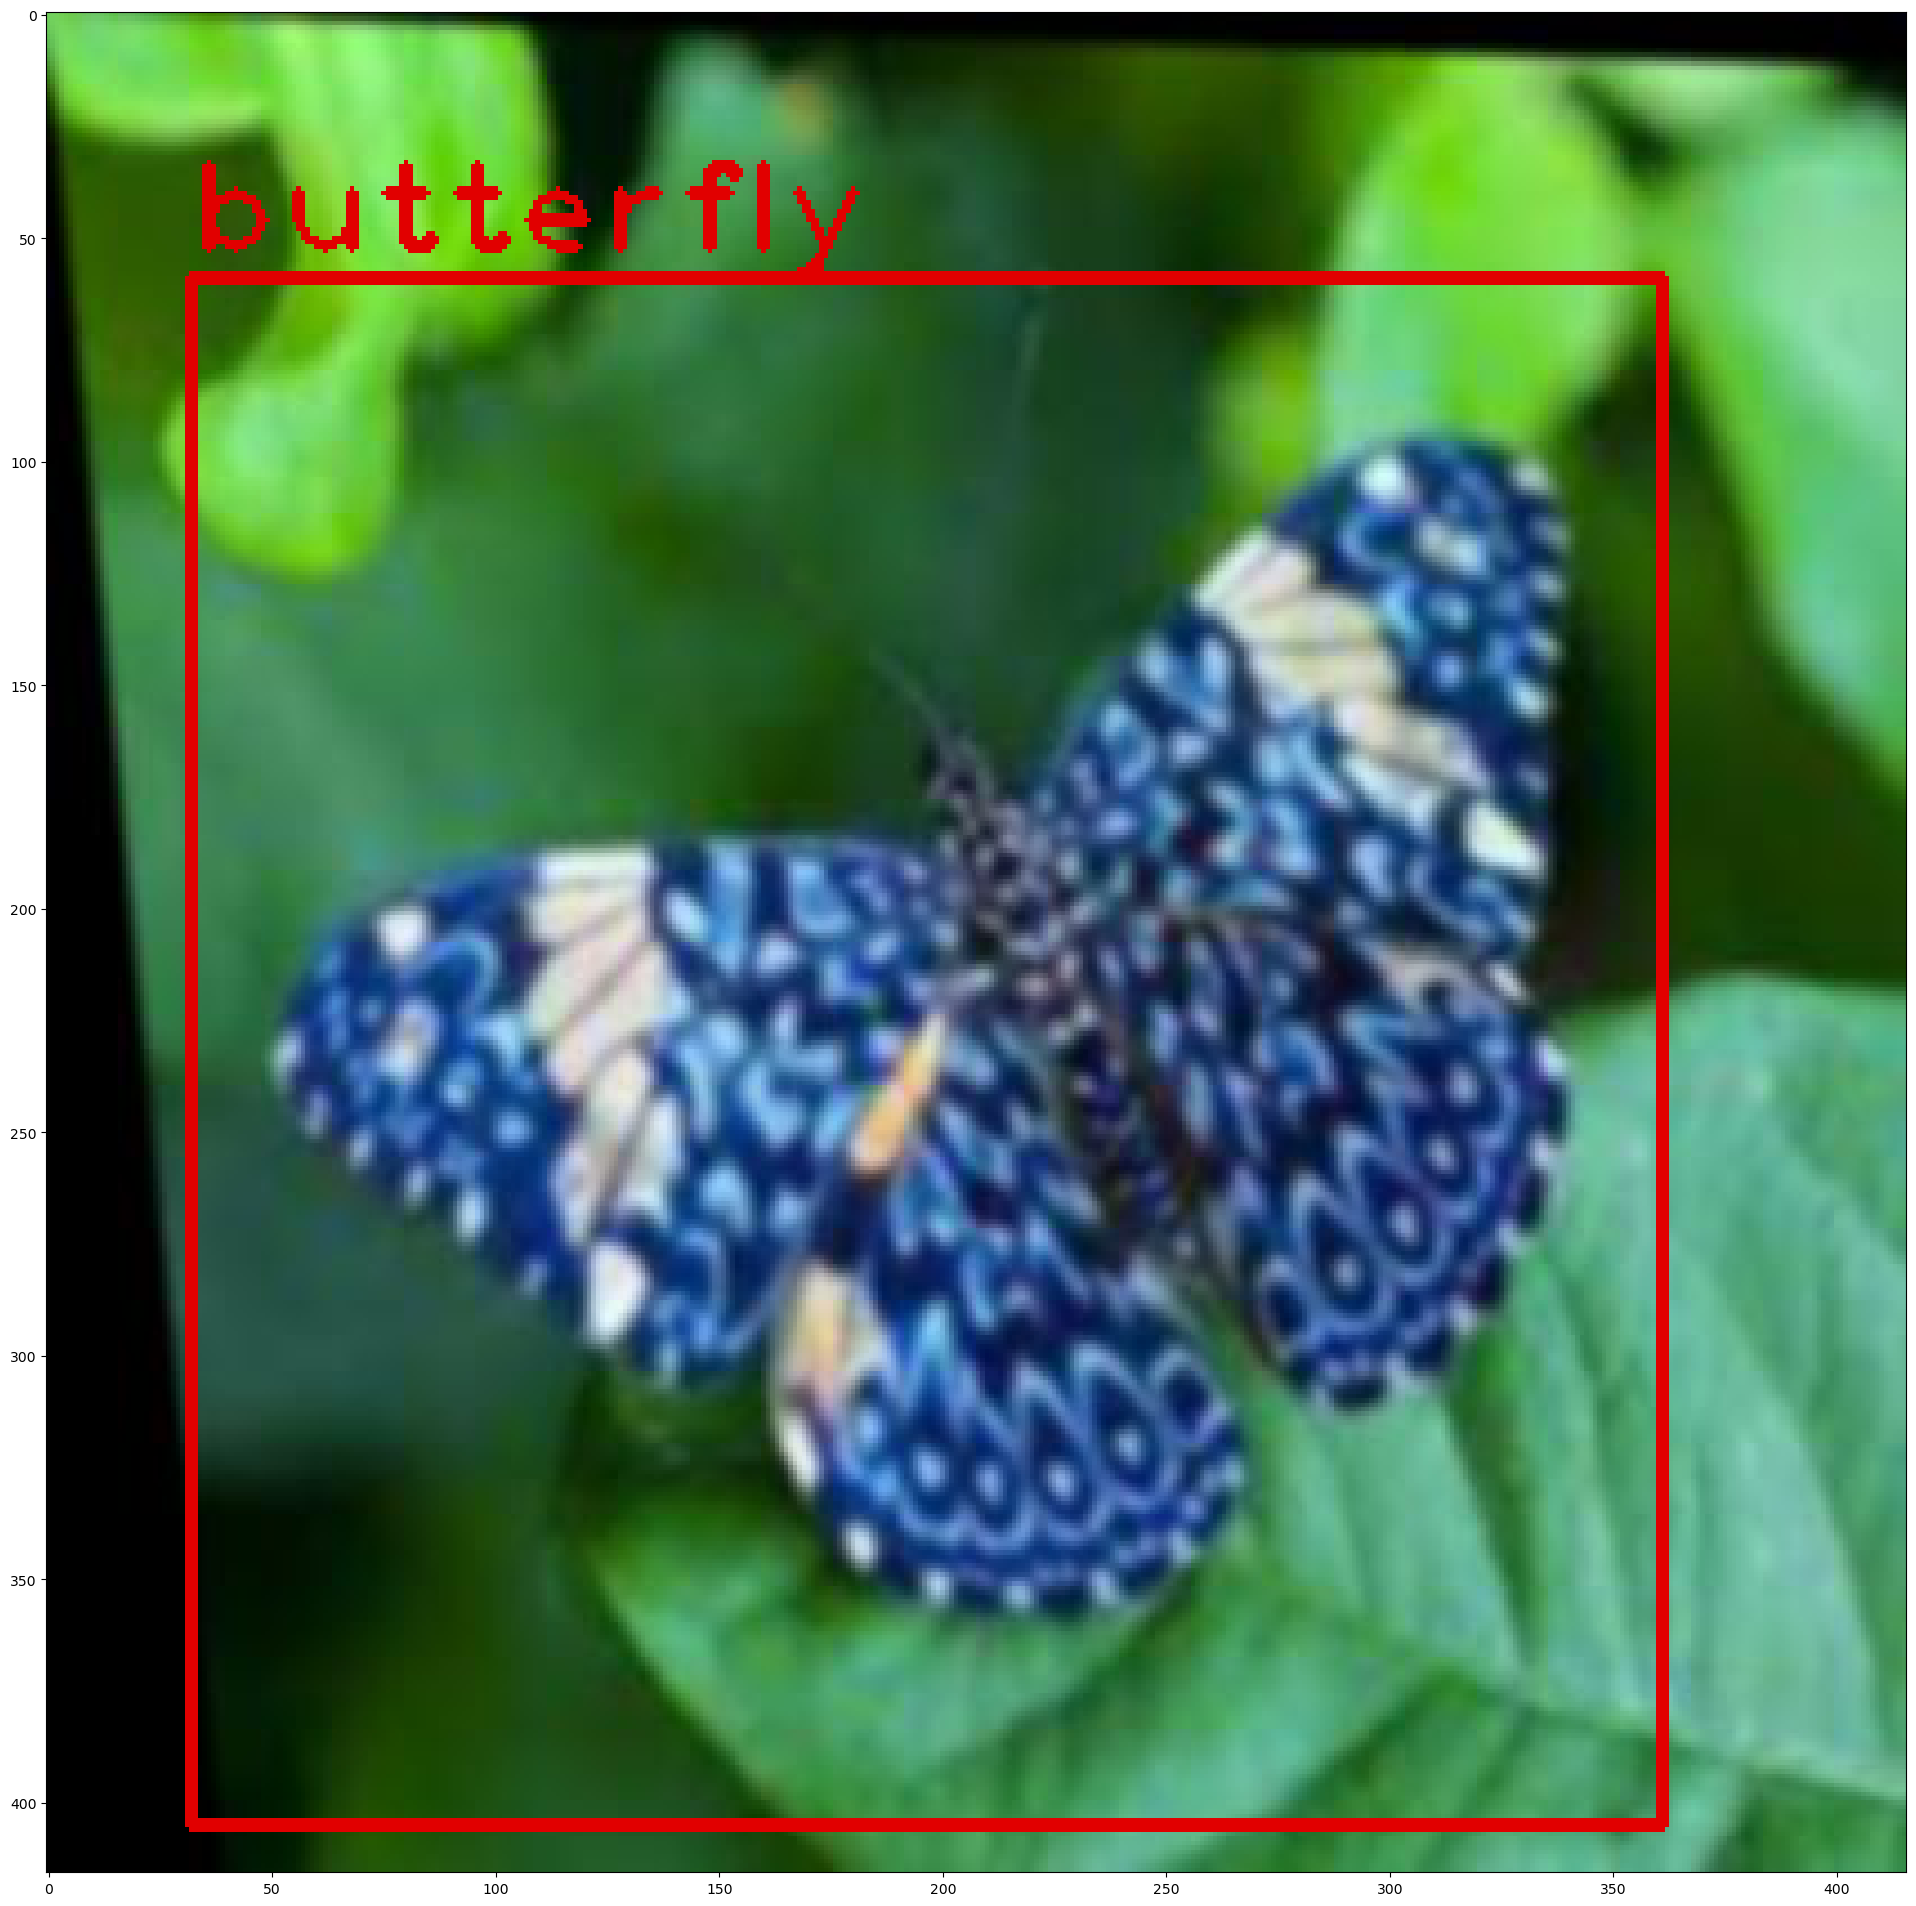

In [26]:
import numpy 

# Working dog
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np

import cv2

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model

# Define the function to perform detection on an image
def detect_objects(_model, image_path):
    # Load the image
    image = Image.open(image_path)
    frame = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)
    
#     results = _model(frame, device="mps")
    
    results = _model.predict(source=image_path, conf=0.0055)
    result = results[0]
    print(results[0].boxes.xyxy)
    bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
    classes = np.array(result.boxes.cls.cpu(), dtype="int")
    print(bboxes, classes)
    for cls, bbox in zip(classes, bboxes):
        (x, y, x2, y2) = bbox
        cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 225), 2)
        cv2.putText(frame, str("butterfly"), (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 225), 2)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Convert the frame to an image
    image2 = Image.fromarray(frame_rgb)
#     image2.show()
    plt.figure(figsize=(24,32))
    plt.imshow(image2)
    plt.show()
    
#     cv2.imshow("Img", frame)
#     cv2.waitKey(1)
    
detect_objects(model2, '/Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets/valid/images/10_jpg.rf.2ac6e960e7c9b24df886805d273a89d3.jpg')


In [25]:
%%bash
cd /Users/hims/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets

pwd
yolo task=detect mode=predict model=/Users/hims/sjsu/sem-3/git/deep-learning/assignment/assignment-4/runs/detect/train8/weights/best.pt conf=0.005 source=test/images



/Users/hims/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets
Ultralytics YOLOv8.1.18 🚀 Python-3.10.13 torch-2.2.0 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

image 1/4 /Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets/test/images/11_jpg.rf.f6ba886248d16e5d94a21da899d988a7.jpg: 640x640 1 Bat, 1 Butterfly, 1 Squid, 108.4ms
image 2/4 /Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets/test/images/12_jpg.rf.5aff21d48decd28294c6c414f1910428.jpg: 640x640 2 Butterflys, 1 Squid, 85.8ms
image 3/4 /Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets/test/images/12_jpg.rf.7fe04cfbc1aa8e687a

# Different Approach

In [ ]:
model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
model.train(data='/Users/hims/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets/data.yaml', epochs=3) 

In [ ]:
detect_objects(model, '/Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets/valid/images/10_jpg.rf.2ac6e960e7c9b24df886805d273a89d3.jpg')